# Titanic Kaggle Competition 
### Purpose 
- Develop an ML model that accurately predicts the survival rate of titanic passengers based on collected demographic data 
- Author: Angelo Sisante 
- Date: 07-25-2020

In [ ]:
# Import Relevant Packages

In [55]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams
%matplotlib inline
import os
from sklearn.model_selection import train_test_split
from sklearn.liniear_model import LogisticRegression 
from sklearn.metrics import confusion_matric, classification_report, accuracy_score, recall_score 

In [4]:
os.getcwd()

'/Users/angelosisante/Documents/Python'

In [5]:
path = '/Users/angelosisante/Documents/Python/titanic'
os.chdir(path)

In [6]:
os.getcwd()

'/Users/angelosisante/Documents/Python/titanic'

## Preliminary Ingestion and Looks at Data

In [45]:
gender_df = pd.read_csv('gender_submission.csv') #This dataset just tells us the answer 
test_df = pd.read_csv('test.csv') #This is the submission df 
train_df = pd.read_csv('train.csv') #This is the one you should run exploratory analyses on

In [46]:
gender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.7 KB


In [47]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [48]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [49]:
gender_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [50]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [51]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Analyses

We now know that `train_df` is the DataFrame we want to play around with. This DataFrame we will analyze for significance. The `test_df` dataframe will be the final data to predict on.  

In [52]:
#Convert Sex to a categorical variable. 1 = Male, 0 = Female. 
train_df['Sex'] = np.where(train_df['Sex']=='male', 1, 0)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [58]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [60]:
train_df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


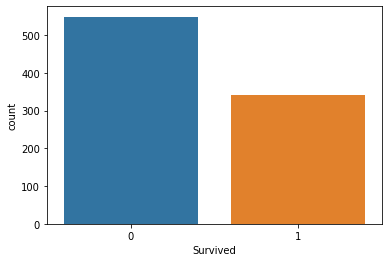

In [61]:
sns.countplot(train_df.Survived)

In [62]:
madeit = train_df[train_df['Survived']==1].shape[0]
didnt = train_df[train_df['Survived']==0].shape[0]
print("Percentage of Survivors", madeit/891 * 100)
print("Percentage of survivors to non-survivors", madeit/didnt * 100)

Percentage of Survivors 38.38383838383838
Percentage of survivors to non-survivors 62.295081967213115


Text(0, 0.5, 'Survival Rate')

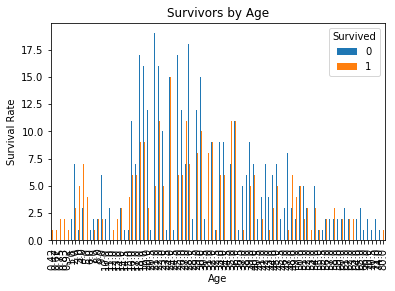

In [64]:
pd.crosstab(train_df.Age, train_df.Survived).plot(kind='bar')
plt.title('Survivors by Age')
plt.xlabel('Age')
plt.ylabel('Survival Rate')

Text(0, 0.5, 'Survival Rate')

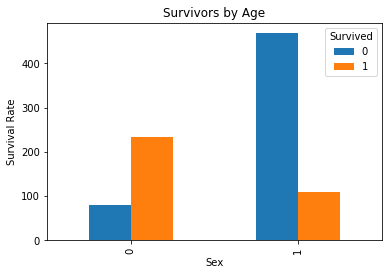

In [65]:
pd.crosstab(train_df.Sex, train_df.Survived).plot(kind='bar')
plt.title('Survivors by Age')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')

Text(0, 0.5, 'Survival Rate')

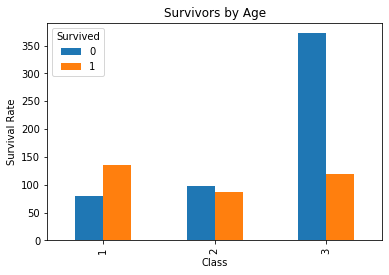

In [66]:
pd.crosstab(train_df.Pclass, train_df.Survived).plot(kind='bar')
plt.title('Survivors by Age')
plt.xlabel('Class')
plt.ylabel('Survival Rate')

Text(0, 0.5, 'Survival Rate')

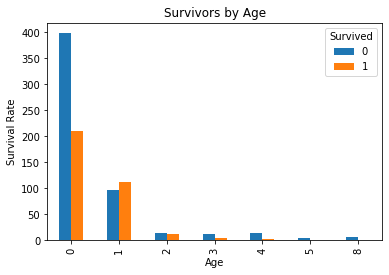

In [67]:
pd.crosstab(train_df.SibSp, train_df.Survived).plot(kind='bar')
plt.title('Survivors by Age')
plt.xlabel('Age')
plt.ylabel('Survival Rate')

Text(0, 0.5, 'Survival Rate')

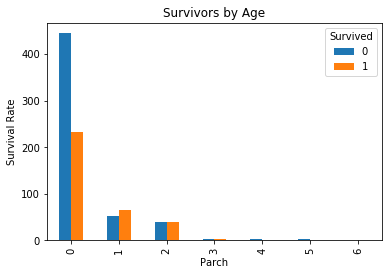

In [68]:
pd.crosstab(train_df.Parch, train_df.Survived).plot(kind='bar')
plt.title('Survivors by Age')
plt.xlabel('Parch')
plt.ylabel('Survival Rate')

Text(0, 0.5, 'Survival Rate')

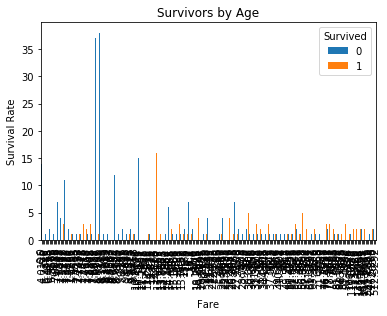

In [69]:
pd.crosstab(train_df.Fare, train_df.Survived).plot(kind='bar')
plt.title('Survivors by Age')
plt.xlabel('Fare')
plt.ylabel('Survival Rate')

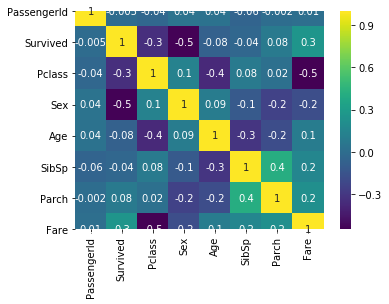

In [71]:
#Correlation Plot
c = train_df.corr()
sns.heatmap(c, annot=True, fmt=".1g", cmap = 'viridis', square = 'True')